# CS1090A Final Project
#### Group 71: Gulirano Almuratova, Eva Pierre Antoine, Victoria Levy, Linh Vu, Binh Vu 
#### Project 43: Predicting US Health Insurance Premiums 

## Introduction 
### Finalized Research Question
Healthcare plans in the United States are polemic and influential topics, affecting millions of Americans every day. Such plans primarily involve insurances and programs that are responsible for covering costs that people might accrue related to any types of medical expenses; they vary expansively based on what they offer, how they relate to people’s careers, and people’s individual characteristics. Relatedly, our project involves using characteristics about people’s lives to predict what their healthcare coverage will be. Specifically, through a set of personalized characteristics, we will predict the cost of a person’s healthcare premium (the monthly cost paid for a healthcare plan).

### Data Description
Our project utilizes data from the 2022 National Health Interview Survey (NHIS), a comprehensive dataset collected annually by the National Center for Health Statistics to capture various aspects of Americans’ health, healthcare access, and insurance coverage. The NHIS uses a stratified multistage probability sampling approach, ensuring representation across diverse demographic and socioeconomic groups. The dataset includes detailed information on individuals’ healthcare plans, personal demographics, health status, and social factors. For our project, we chose only relevant variables including healthcare premium costs, demographic characteristics (e.g., age, gender, race, and education level), health ratings, and lifestyle factors such as marital and employment status. We filtered the data to only include 18+ individuals and those with private health insurance. 

### Data Preparation
With a new dataset from our previous milestone, we began by cleaning and reformatting categorical variables, translating numerical codes into meaningful descriptors (e.g., yearly doctor visits, gender, health rating, education, race, region, and marital status). Binary variables, such as military service, citizenship, and employment status, were standardized to 0 and 1 values. To address missing data, we excluded rows lacking definitive healthcare premium information (e.g., missing, unknown, or refused responses). We decided against imputing values for this as it is our predictor variable; it seemed counterintuitive to predict a value to impute and then use our model to then predict that value again. Additionally, we had to recode certain variables due to the differences in universes. For example, those who did not smoke were not asked how often they smoked. In such cases, we recoded the NaNs to a 0. 


In [2]:
import pandas as pd
cleaned_df = pd.read_csv("cleaned_data.csv")
cleaned_df["HIPCOST"]

0        2400.0
1        3000.0
2        3250.0
3        7200.0
4        1300.0
          ...  
12621    4632.0
12622    3600.0
12623       0.0
12624    4800.0
12625    1350.0
Name: HIPCOST, Length: 12626, dtype: float64

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dropped_df = cleaned_df.drop(columns = ["FAMKIDNO"]).dropna()
dropped_df

cleaned_df['LOG_HIPCOST'] = np.log1p(cleaned_df['HIPCOST'])

In [36]:
X = pd.get_dummies(dropped_df[['AGE', 'BMICALC', 'MARSTCUR', 'GOTWELF', 'DEMENTIAEV', 'REGION', 'DVINT', 'SMOKFREQNOW']], 
                   columns=['MARSTCUR', 'REGION','DVINT','SMOKFREQNOW'], 
                   drop_first=True)
y = dropped_df['HIPCOST']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 21995920.06459878
R-squared (R2): 0.04474442689163827


Skewness of predictors:
 HIP2COST        22.372203
DEMENTIAEV      11.584571
HIMCAIDE         8.522644
CHRFATIGEV       8.143809
YSKIPMEDYR       6.697594
STROKEV          6.524329
YSKIMPMEDYR      6.177461
HIMILITE         6.040772
HEARTATTEV       5.530209
YDELAYMEDYR      5.319046
DELAYINS         5.188643
COPDEV           5.001420
GOTSSISSDI       4.496697
IMSPCHC          4.281044
DELAYCOST        4.275333
HRAUSES          4.221331
YDELAYMENTAL     4.215953
CHEARTDIEV       4.137851
ARMFEV           4.030412
HIP1COST         3.665675
HIPCOST          3.652525
HOSPNGHT         3.204397
HIPROBPAYR       3.082168
DIABETICEV       2.960978
CANCEREV         2.347588
SAWMENT          2.300455
ASTHMAEV         2.151762
THERAPYR         2.131306
DEPRESSEV        1.844331
MDEXUPADV        1.415520
ARTHGLUPEV       1.317099
HIMCAREE         1.221392
CHOLHIGHEV       0.852595
HYPERTENEV       0.732441
BMICALC          0.732248
FAMKIDNO         0.076657
AGE              0.052427
HOURSWRK     

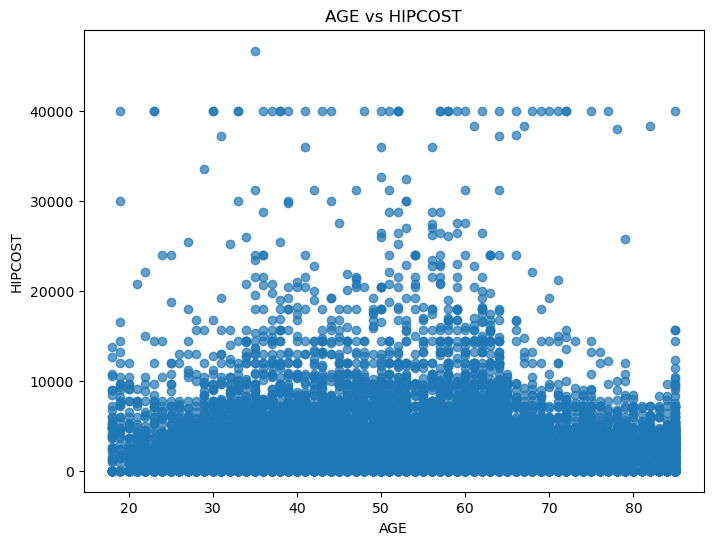

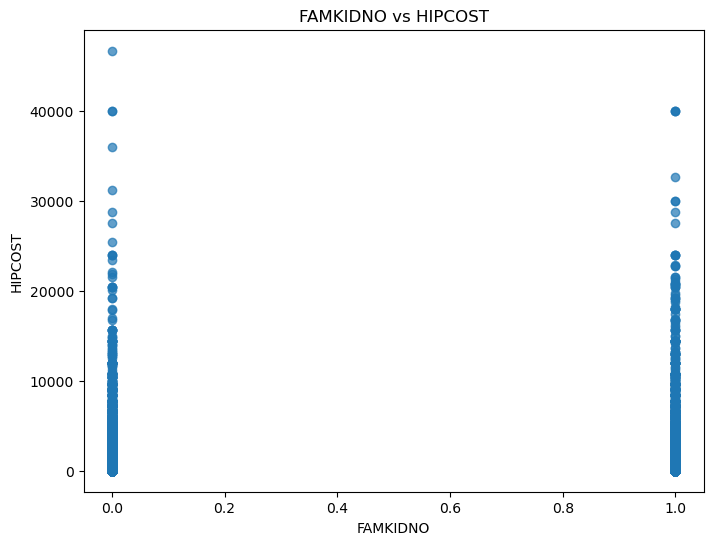

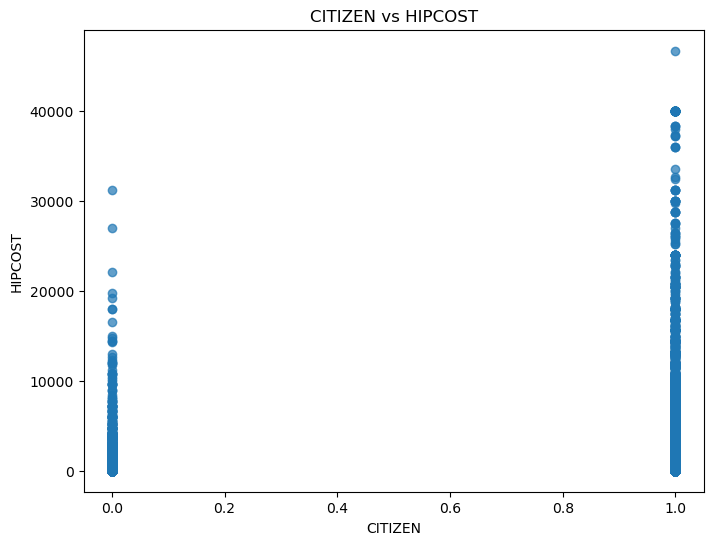

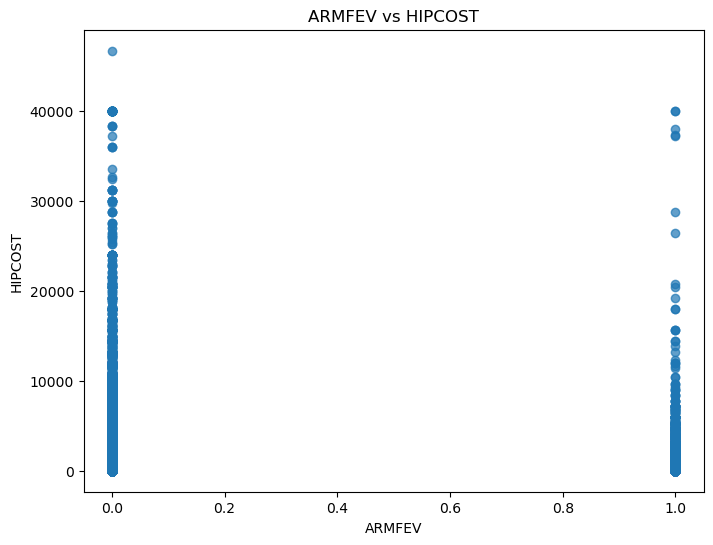

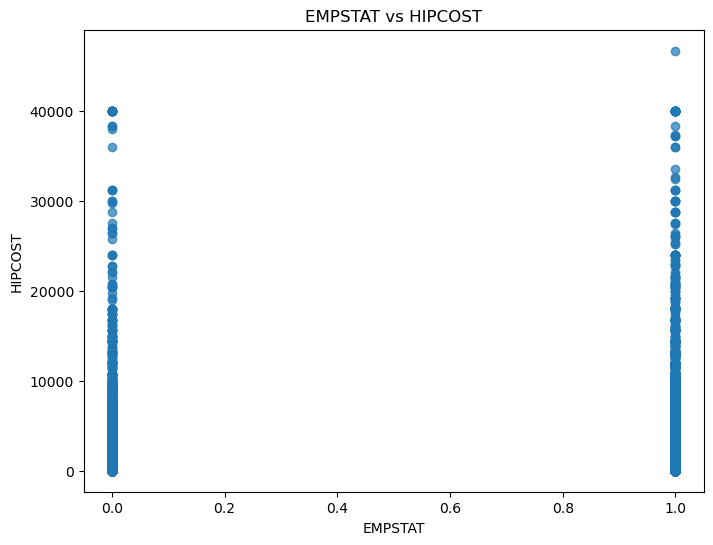

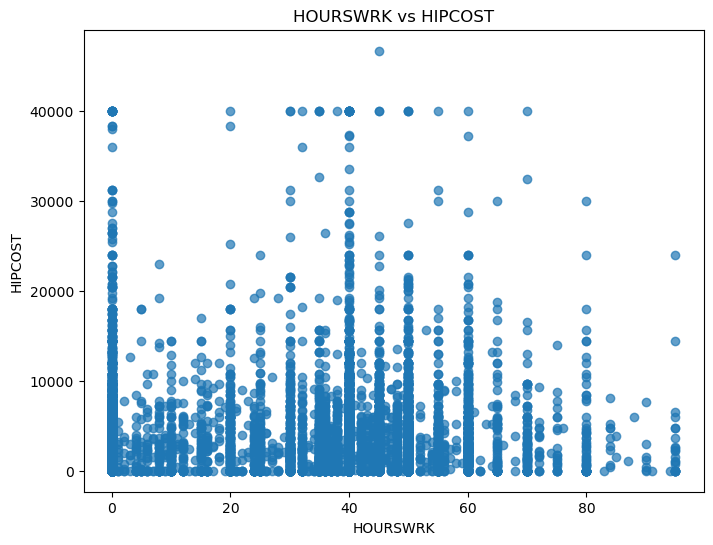

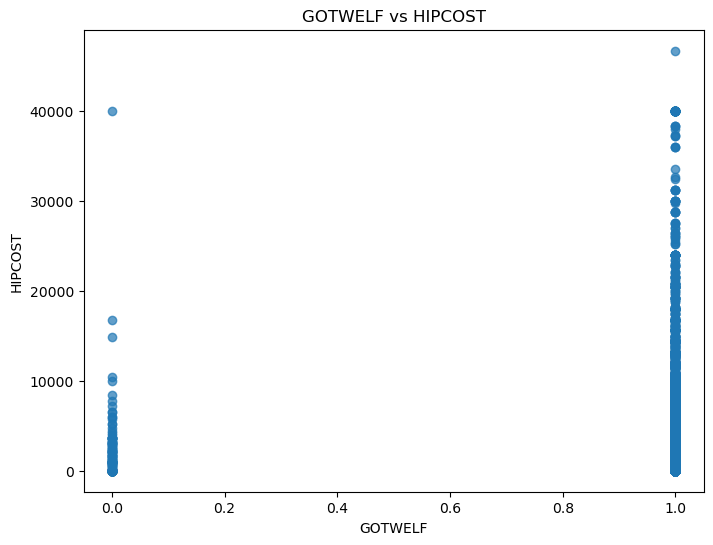

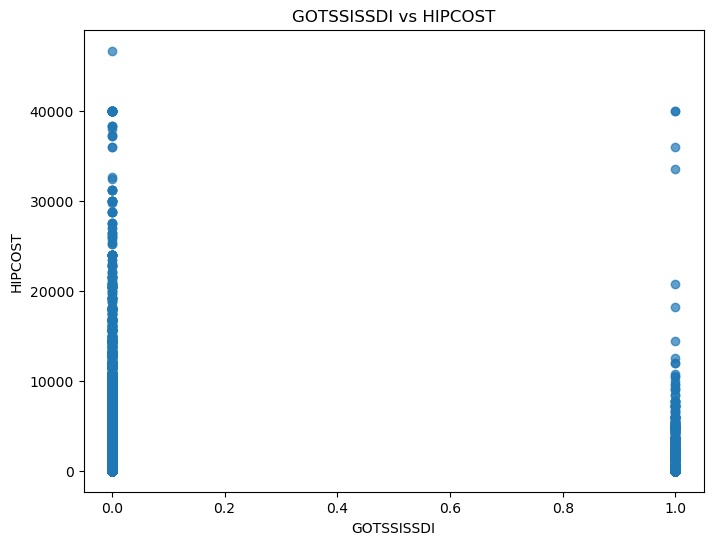

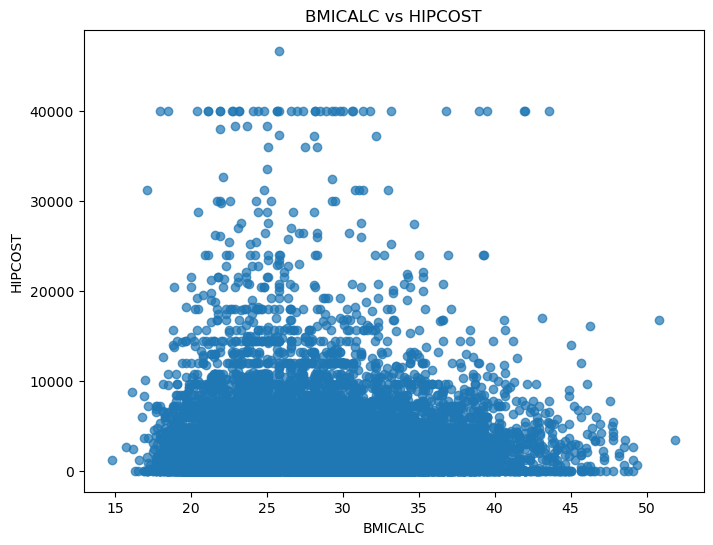

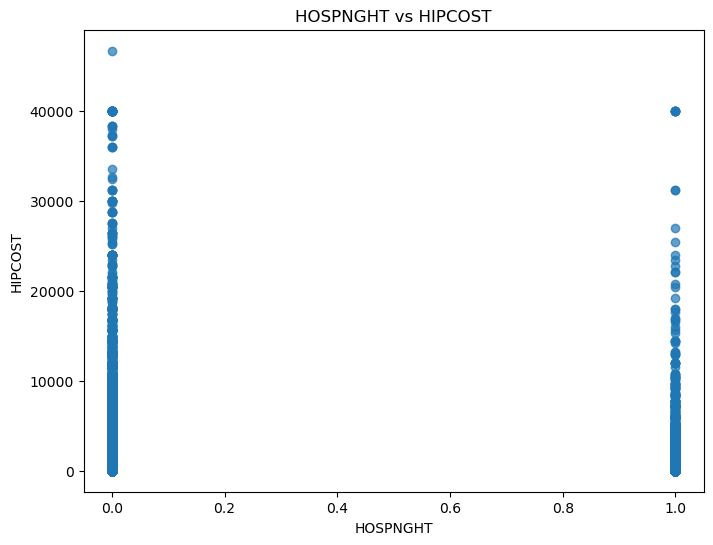

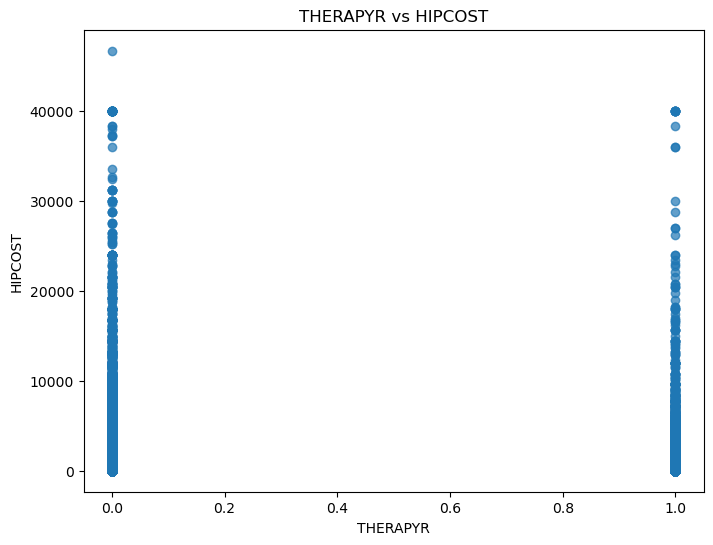

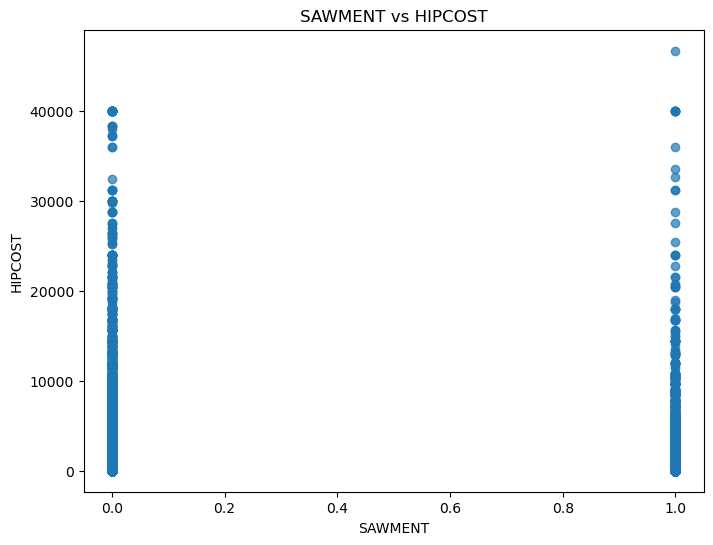

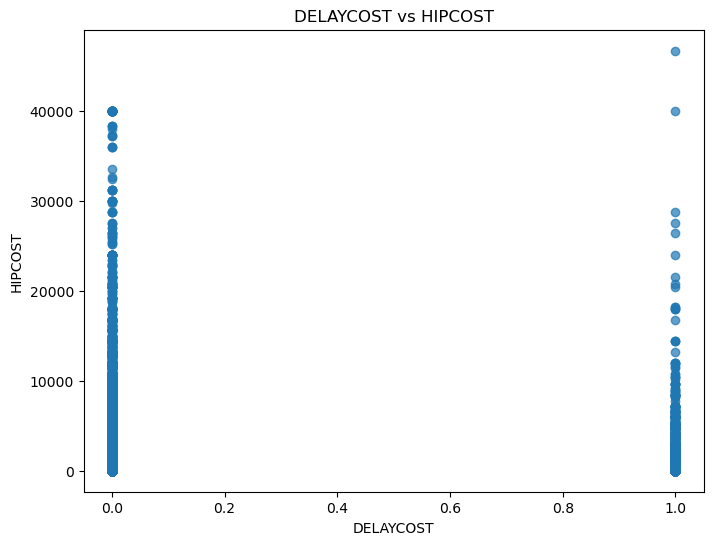

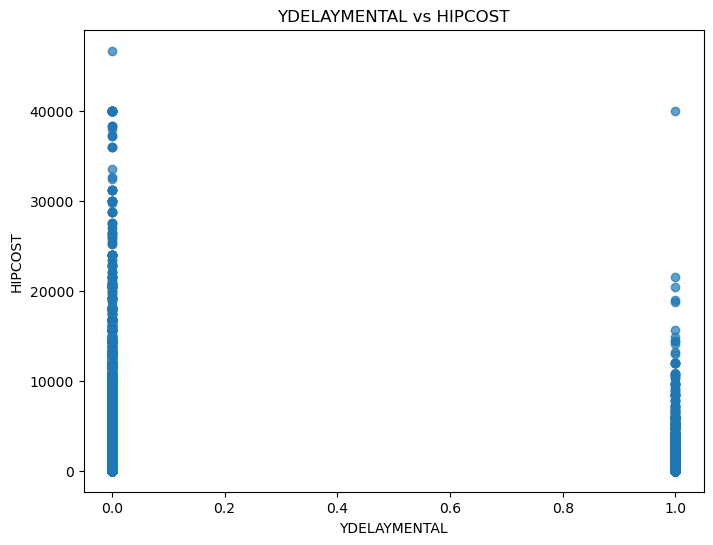

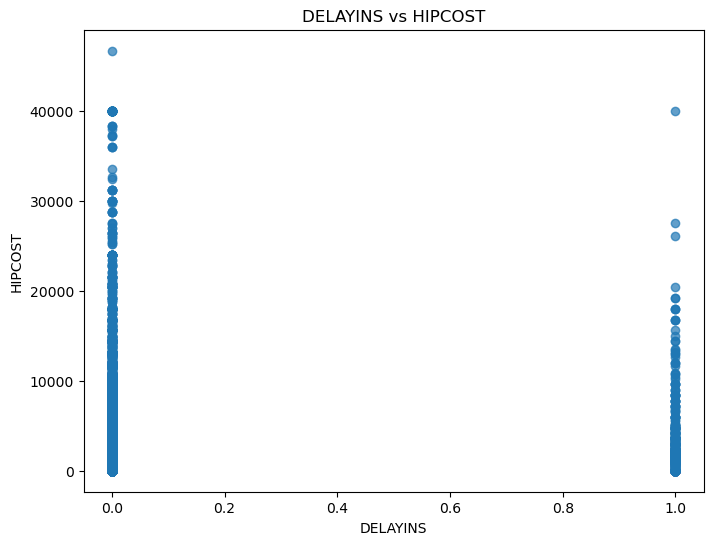

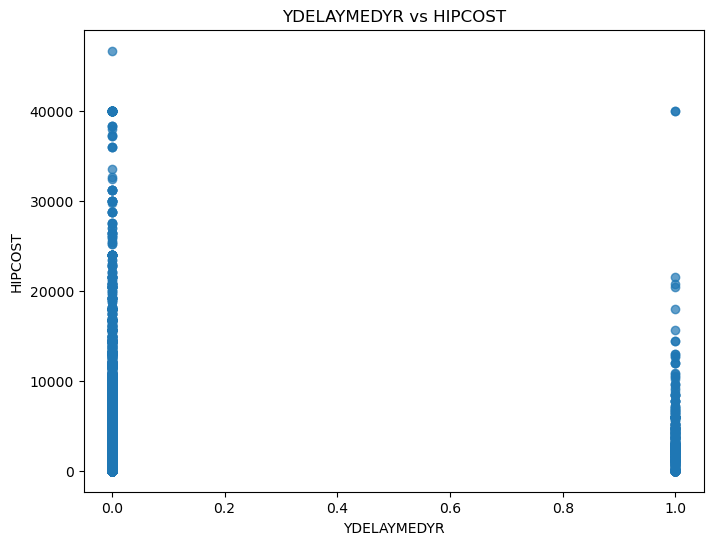

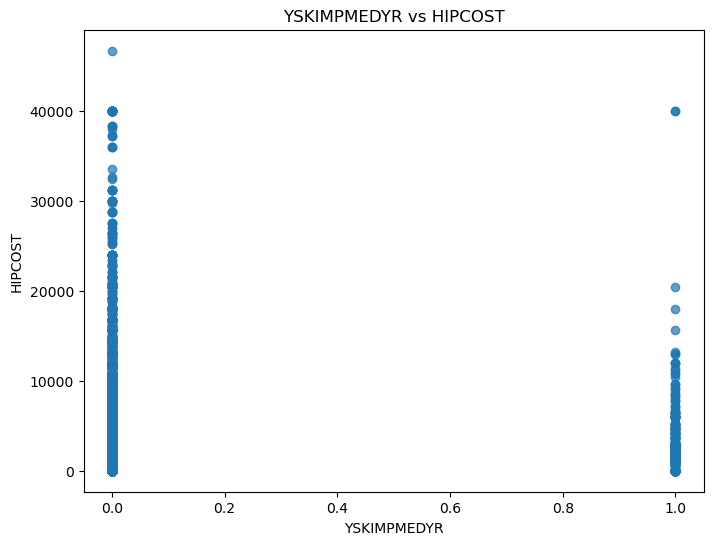

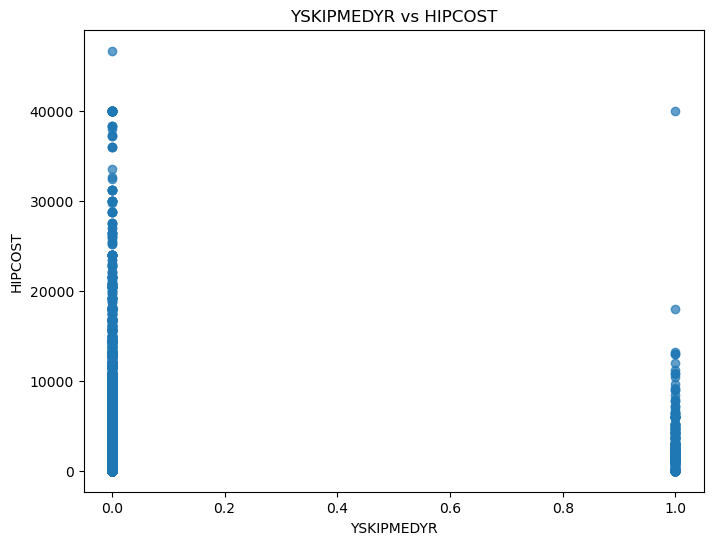

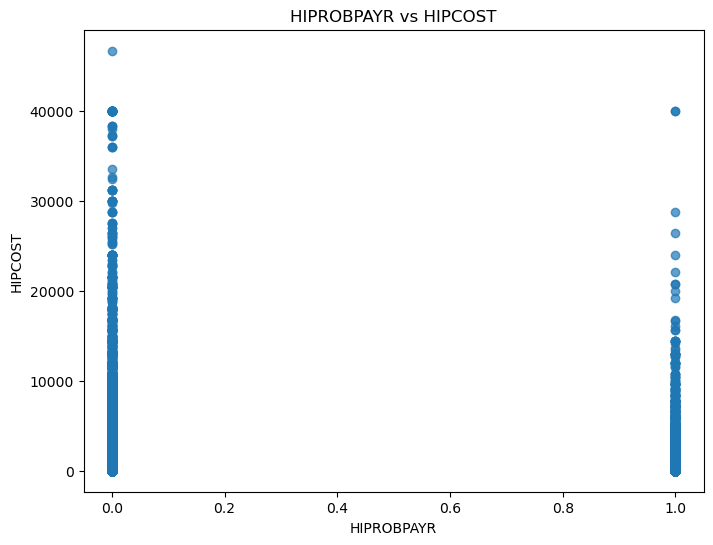

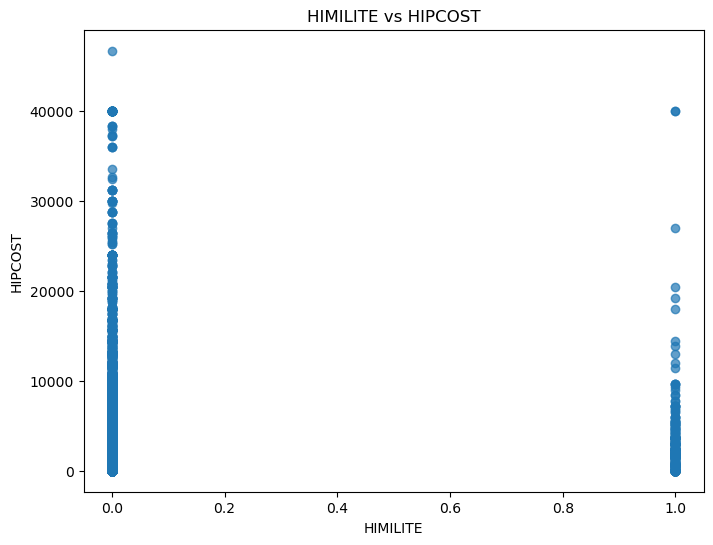

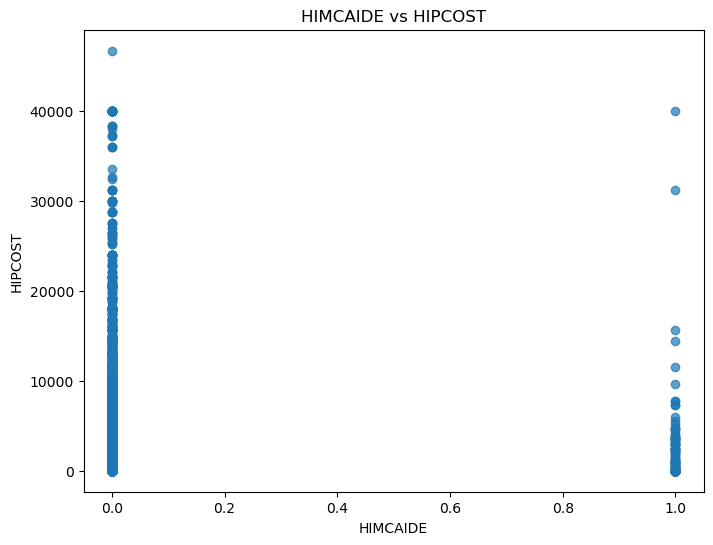

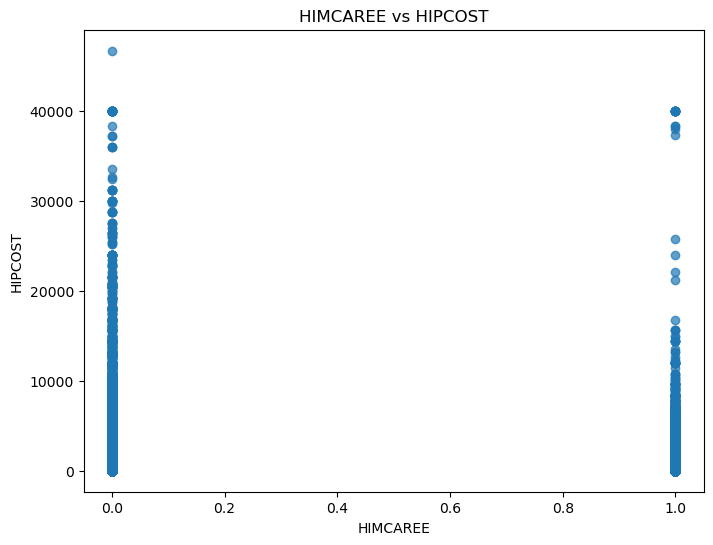

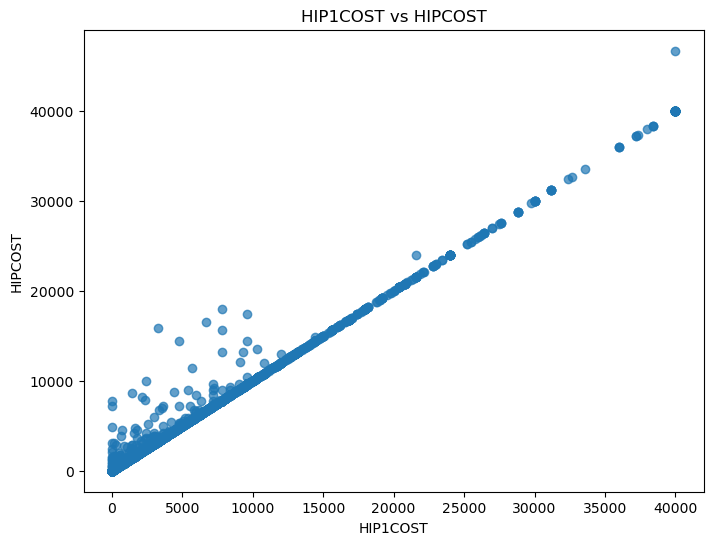

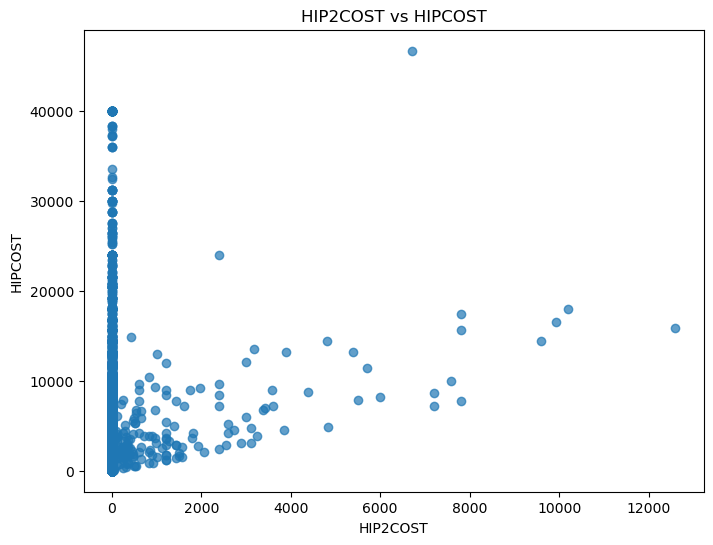

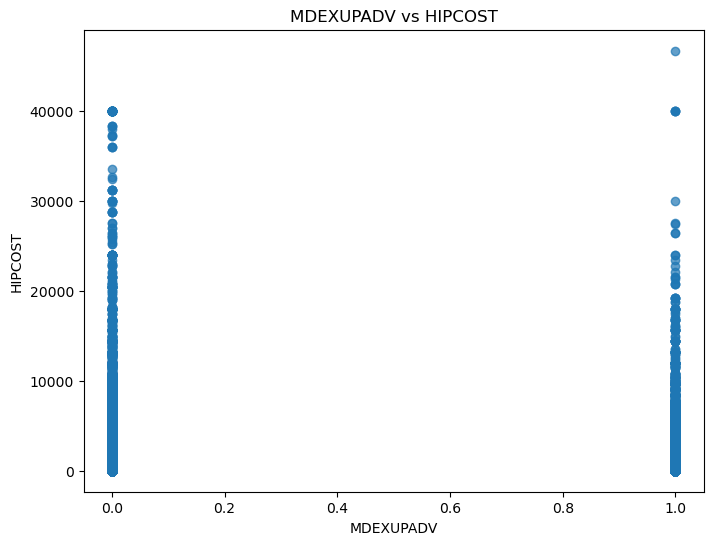

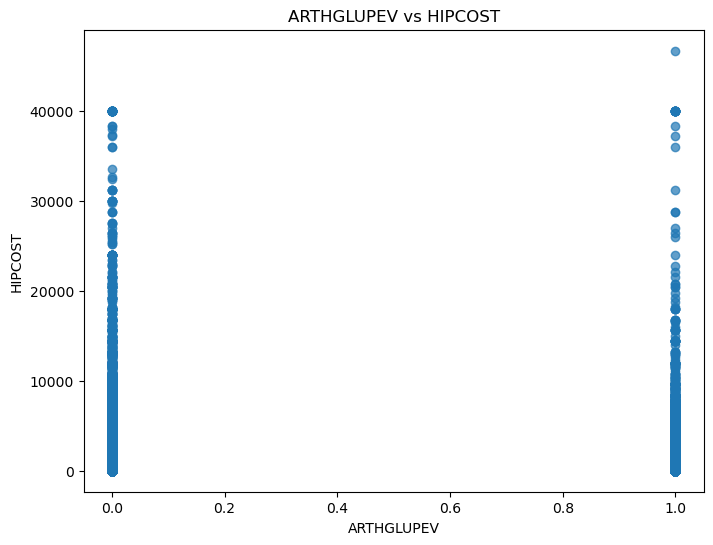

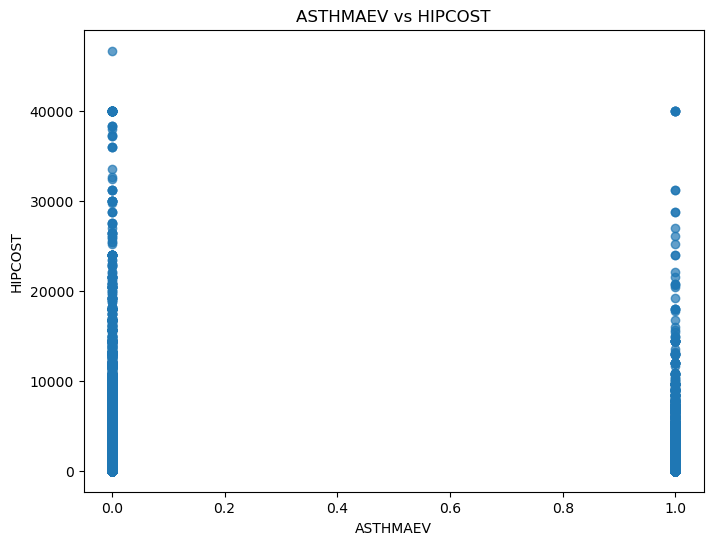

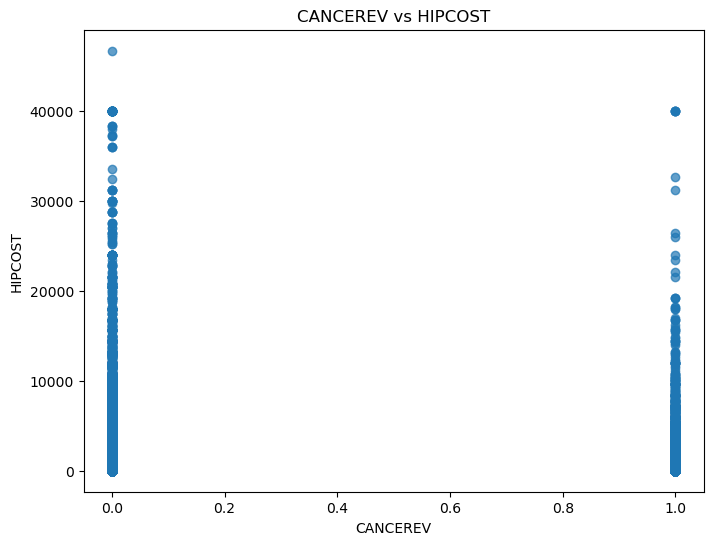

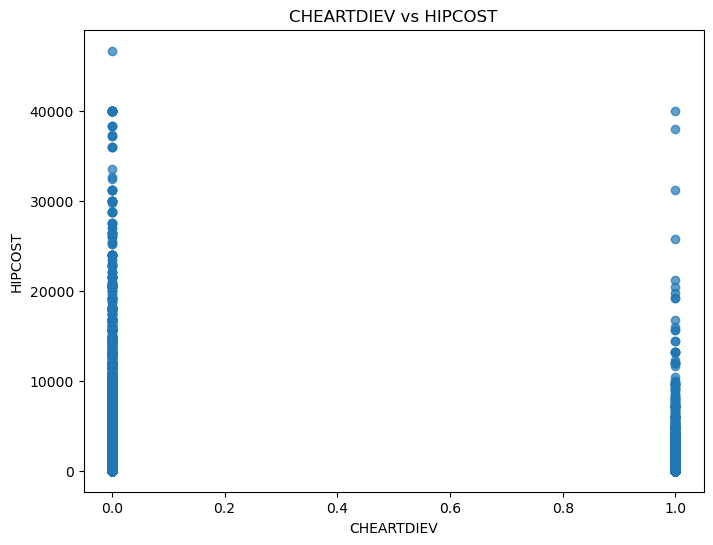

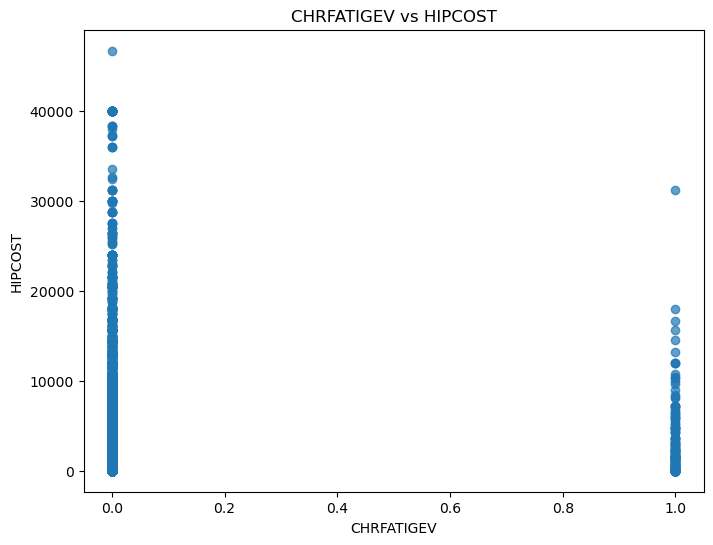

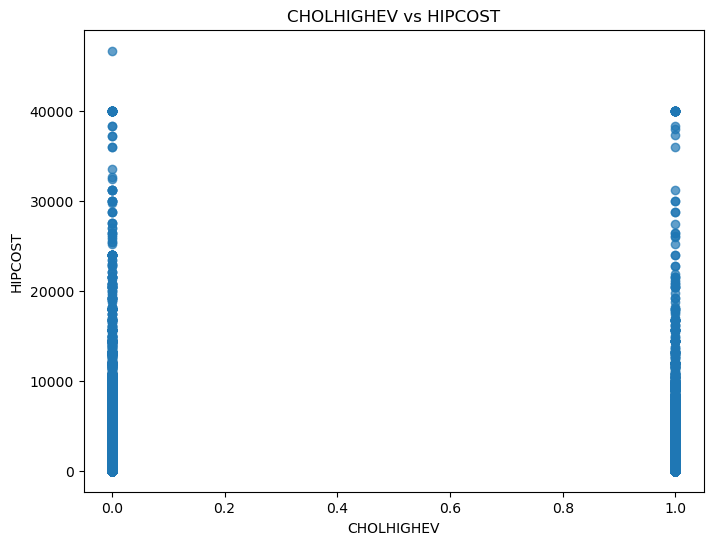

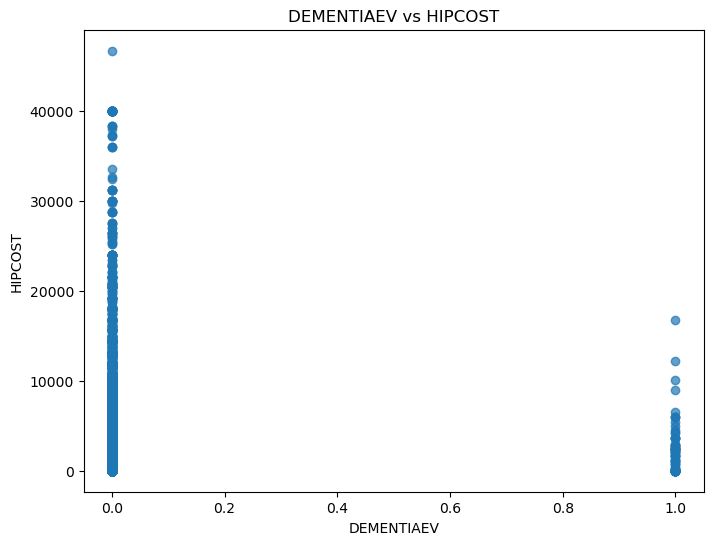

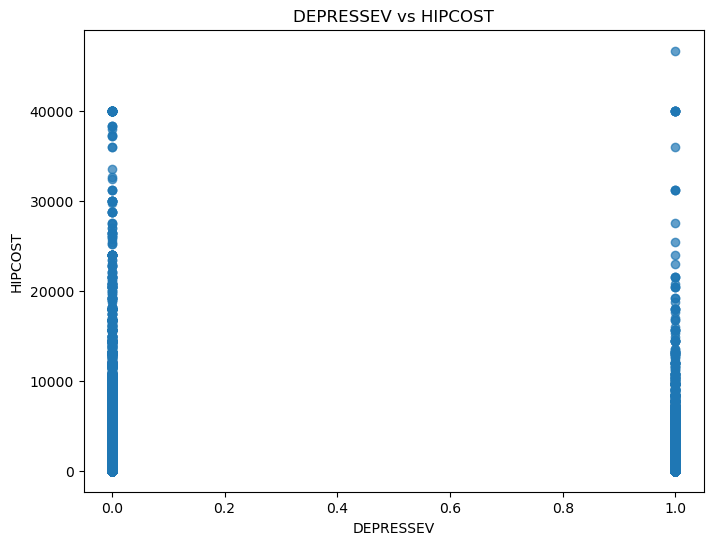

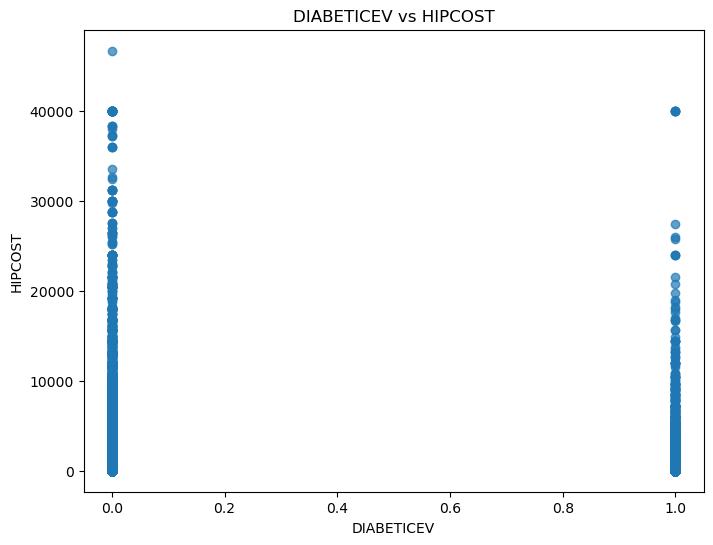

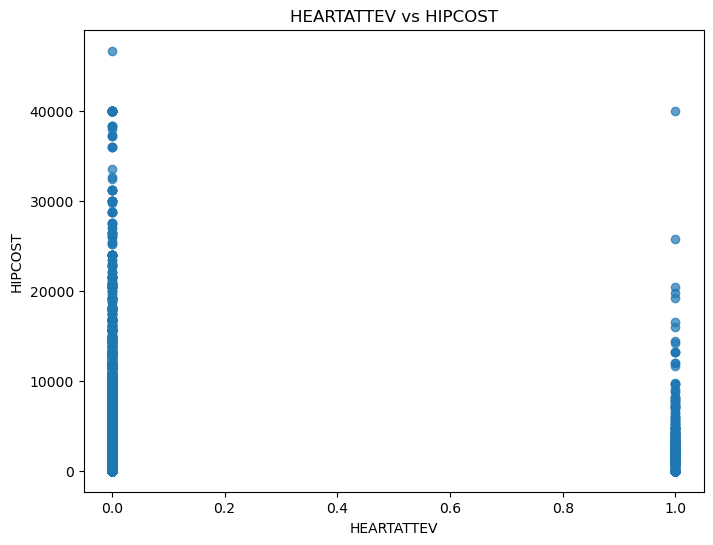

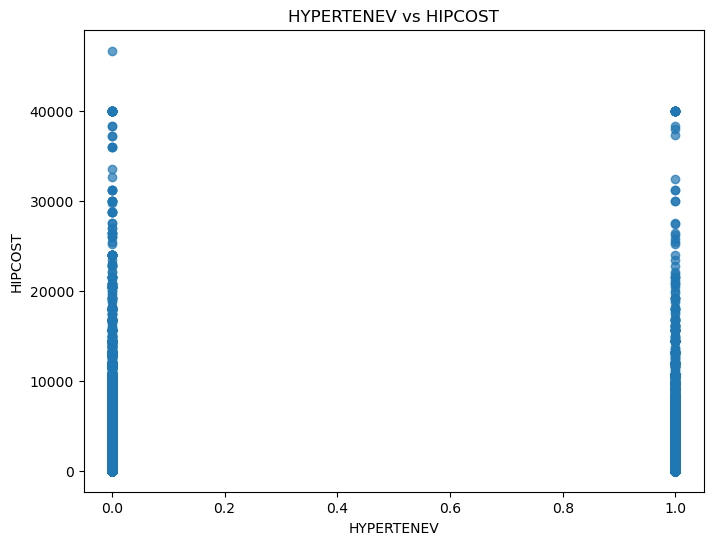

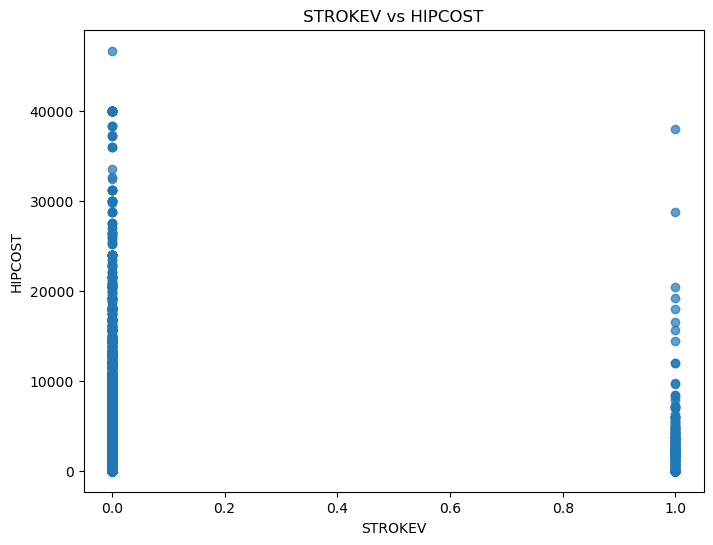

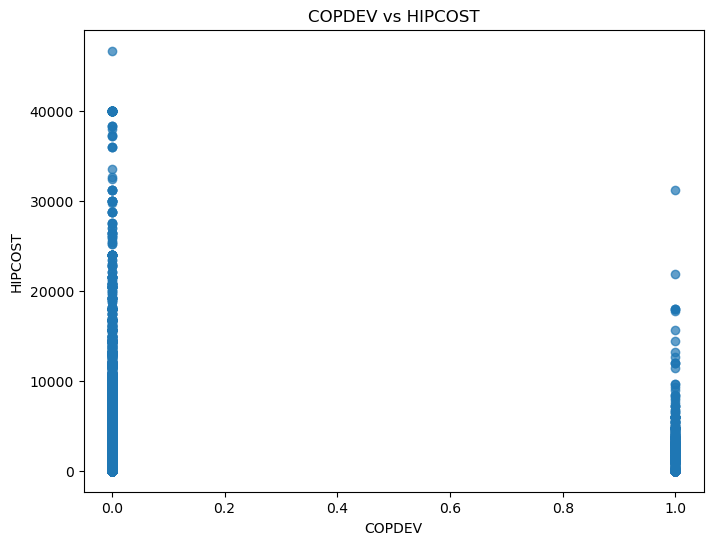

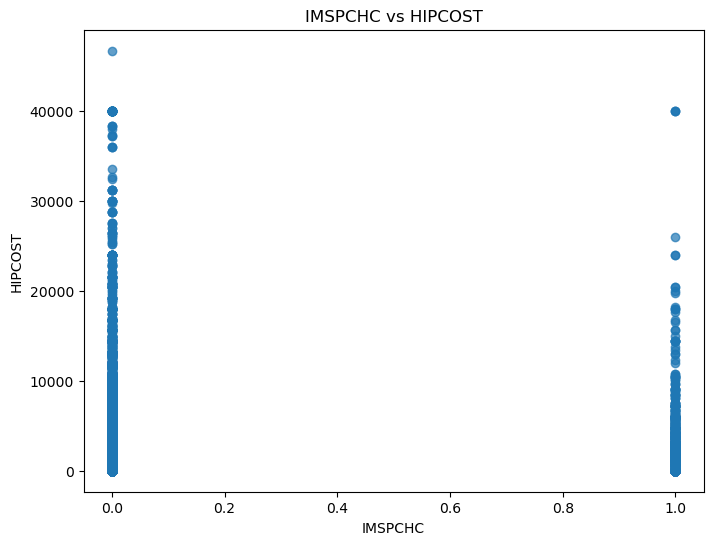

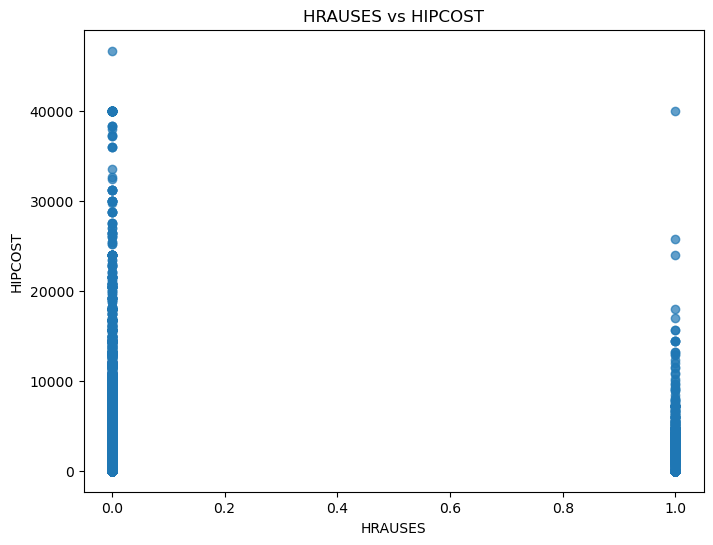

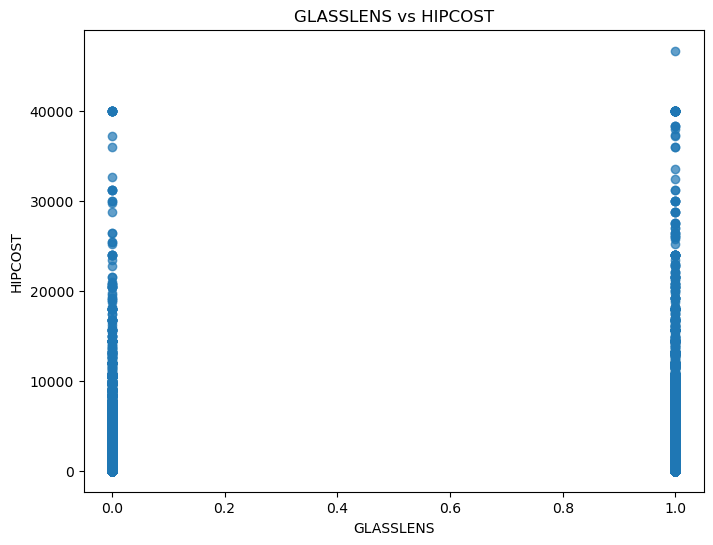

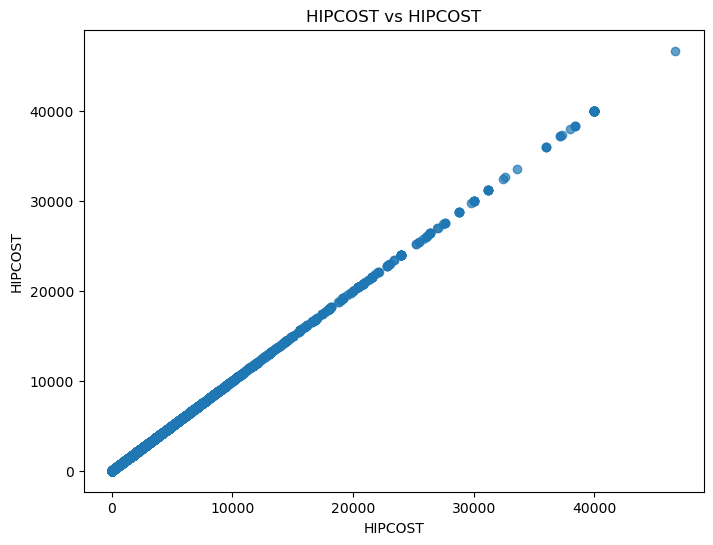

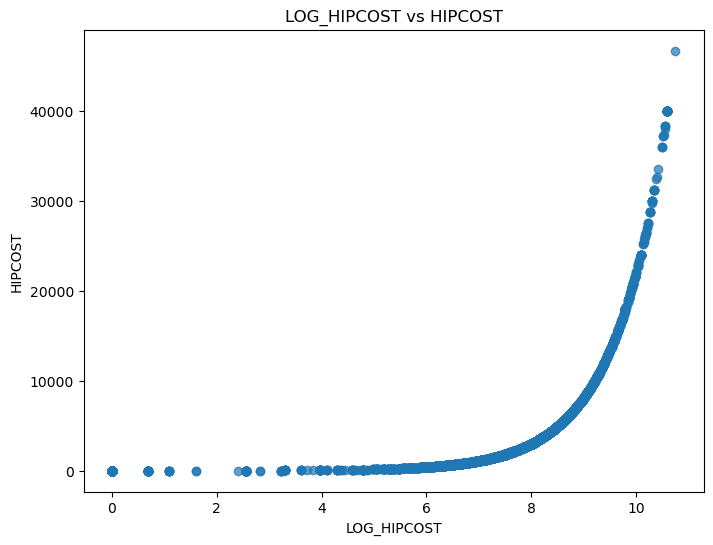

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_predictors = cleaned_df.select_dtypes(include=['float64', 'int64'])
skewness = numerical_predictors.skew().sort_values(ascending=False)
print("Skewness of predictors:\n", skewness)

# Plot scatterplots to inspect relationships
for column in numerical_predictors.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(cleaned_df[column], cleaned_df['HIPCOST'], alpha=0.7)
    plt.title(f'{column} vs HIPCOST')
    plt.xlabel(column)
    plt.ylabel('HIPCOST')
    plt.show()


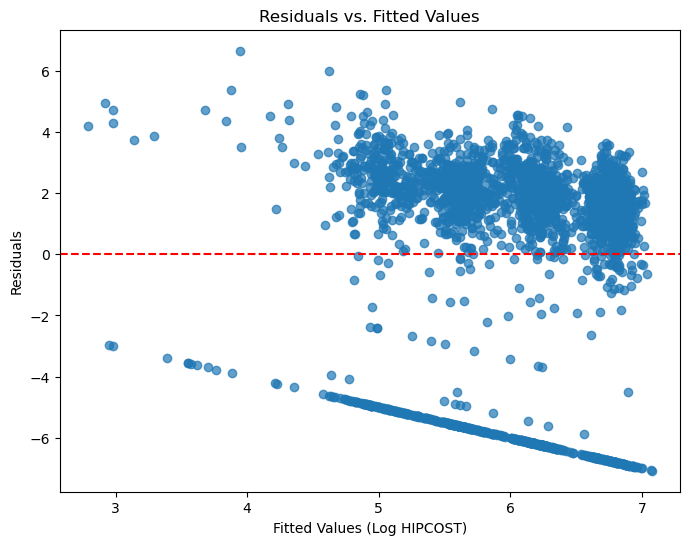

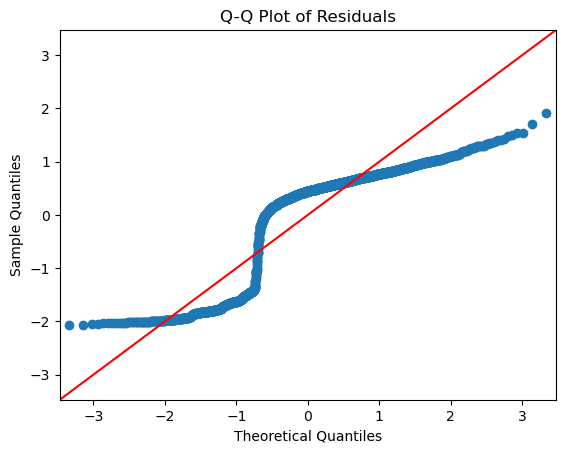

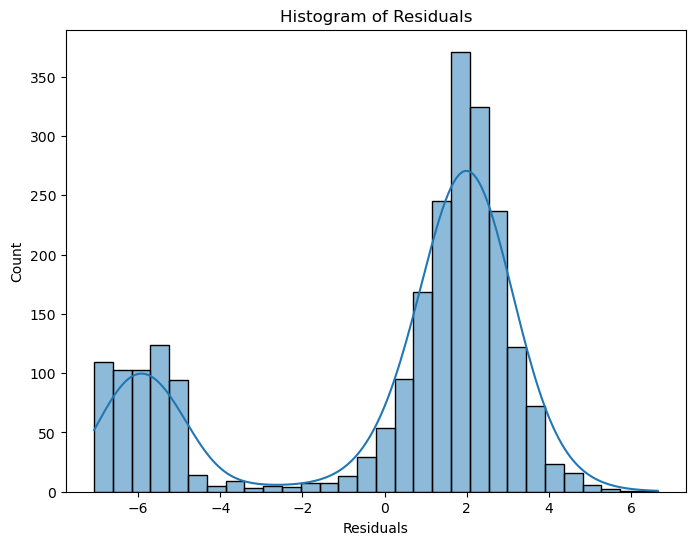

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Calculate residuals
y_pred_log = model.predict(X_test)
residuals = y_test - y_pred_log

# Plot 1: Residuals vs. Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_log, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Log HIPCOST)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Plot 2: Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot 3: Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()



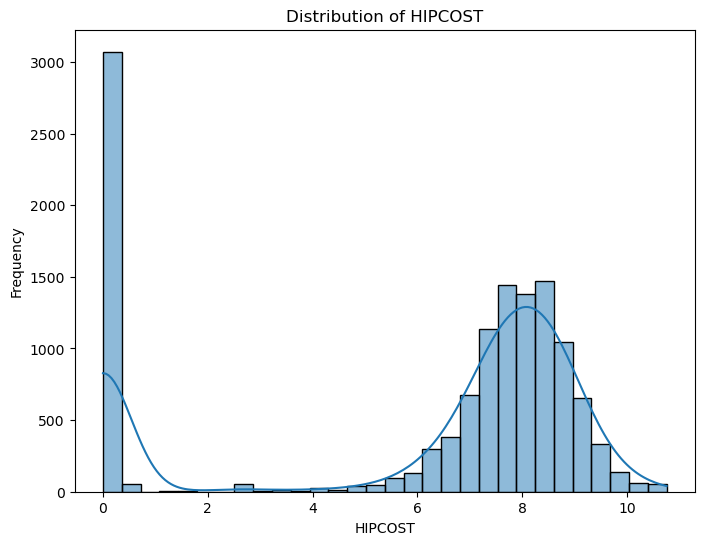

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
cleaned_df['LOG_HIPCOST'] = np.log1p(cleaned_df['HIPCOST'])
sns.histplot(cleaned_df['LOG_HIPCOST'], kde=True, bins=30)
plt.title('Distribution of HIPCOST')
plt.xlabel('HIPCOST')
plt.ylabel('Frequency')
plt.show()

In [25]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients

,Feature,Coefficient
0,AGE,-12.475877
1,BMICALC,-0.286625
2,GOTWELF,1563.095558
3,DEMENTIAEV,-804.467573
4,MARSTCUR_Living with partner,-850.538836
5,"MARSTCUR_Married, spouse absent",193.900084
6,"MARSTCUR_Married, spouse present",1313.582746
7,MARSTCUR_Never Married,-815.711260
8,MARSTCUR_Separated,153.730858
9,MARSTCUR_Widowed,-372.570505


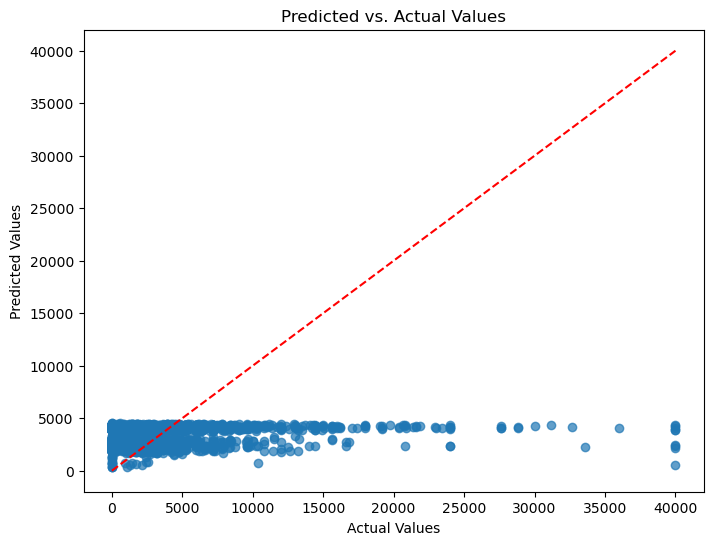

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [10]:
y = dropped_df['HIPCOST']
X = dropped_df.drop(columns=['HIPCOST'])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3.2934737684147657e-23
R-squared (R2): 1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

y = dropped_df['HIPCOST']
X = dropped_df.drop(columns=['HIPCOST'])
X = pd.get_dummies(X, drop_first=True)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

